In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DSBDAL_FINAL/Practical 9-20230517T153259Z-001/Practical 9/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<ipython-input-8-a127e8039910>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(),annot=True)


<Axes: >

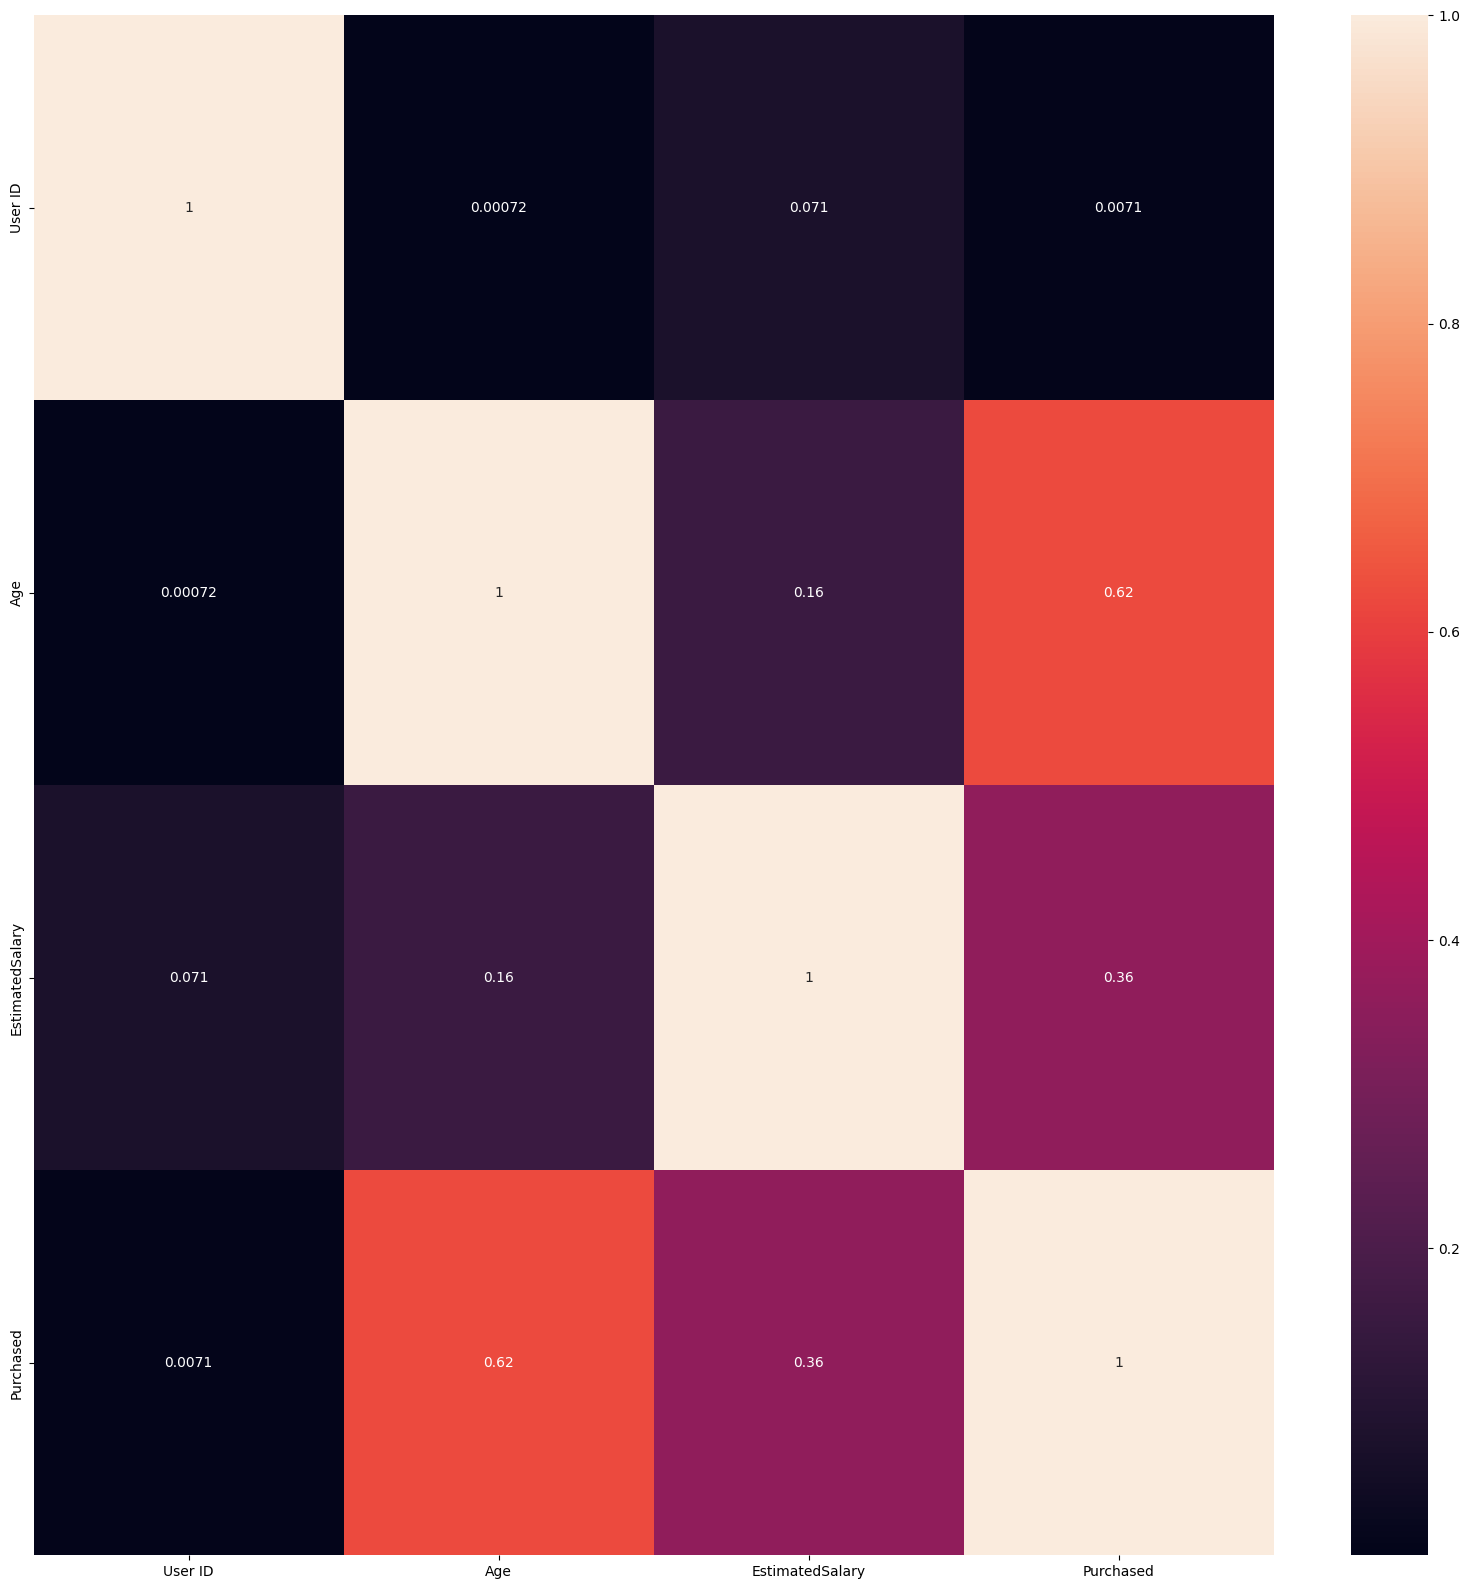

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True)

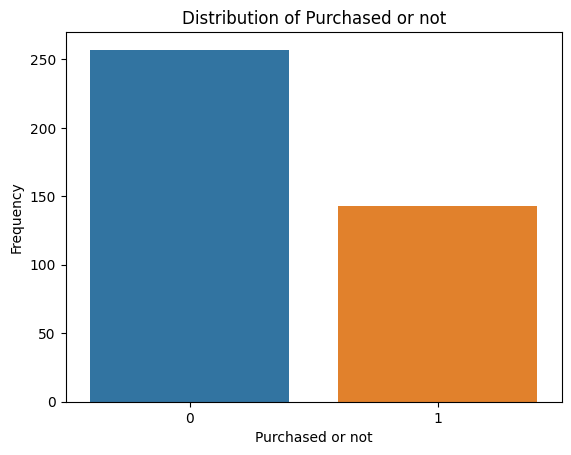

In [ ]:
sns.countplot(x='Purchased', data=df)
plt.title('Distribution of Purchased or not')
plt.xlabel('Purchased or not')
plt.ylabel('Frequency')
plt.show()

(array([ 65.,  81., 142.,  66.,  46.]),
 array([18. , 26.4, 34.8, 43.2, 51.6, 60. ]),
 <BarContainer object of 5 artists>)

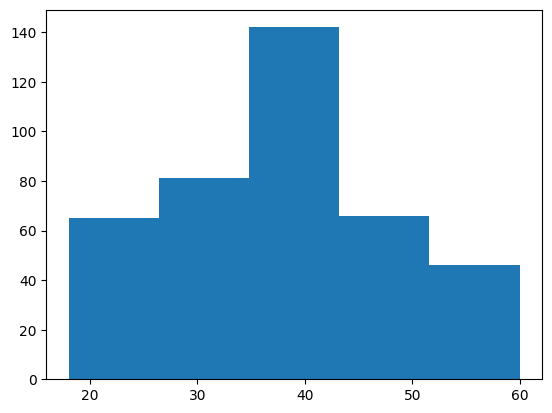

In [ ]:
plt.hist(x='Age',data=df,bins=5)

In [ ]:
x=df[['Age','EstimatedSalary']]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(280, 2)
(120, 2)
(280,)
(120,)


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)
print(y)
print(y_pred)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1=confusion_matrix(Y_test,y_pred)
print(cm1)
ac1=accuracy_score(Y_test,y_pred)
print(ac1)

[[76  0]
 [44  0]]
0.6333333333333333


In [ ]:
tp=cm1[0][0]  #true positive
tn=cm1[1][1]  #t3rue negative
fp=cm1[1][0]  #false positive
fn=cm1[0][1]  #false negative
total=tp+tn+fp+fn

In [ ]:
error_rate=(fp+fn)/(total)
print('error rate: ')
print(error_rate)

error rate: 
0.36666666666666664


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
